In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [43]:
df=pd.read_csv('house_price.csv')

In [44]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [46]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [47]:
len(df)

13200

In [48]:
df.shape

(13200, 7)

C:\Users\jeeva\AppData\Local\Temp\ipykernel_24984\2172597298.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

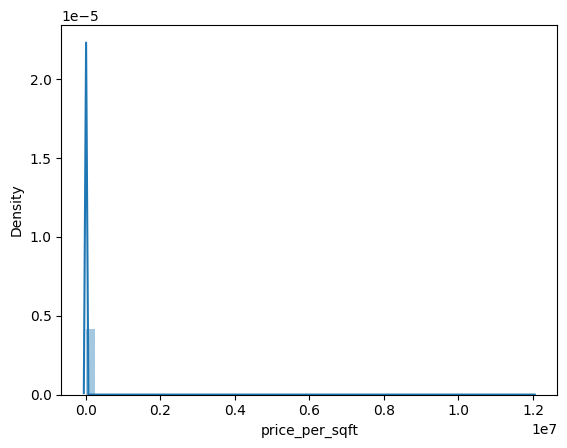

In [49]:
#Distribution of price per sqft
sns.distplot(df['price_per_sqft'])

<Axes: ylabel='price_per_sqft'>

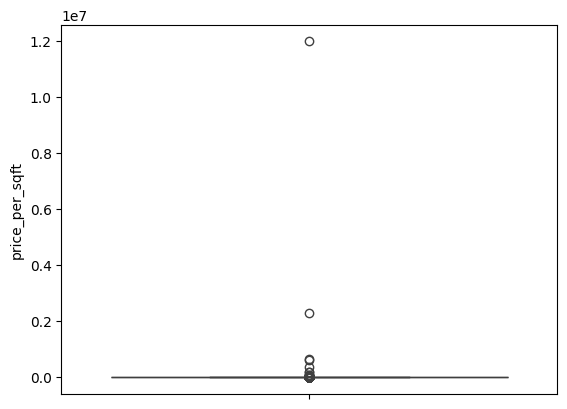

In [50]:
#outliers using boxplot
sns.boxplot(df['price_per_sqft'])

In [51]:
#Using mean and Standard deviation
mean=df['price_per_sqft'].mean()
std=df['price_per_sqft'].std()
mean_price_persqft=df['price_per_sqft'].mean()
std_price_persqft=df['price_per_sqft'].std()
print("mean=",mean_price_persqft)
print("Standard deviation=", std_price_persqft)

mean= 7920.336742424242
Standard deviation= 106727.16032810867


In [52]:
ul=mean_price_persqft + 3*std_price_persqft
ll=mean_price_persqft - 3*std_price_persqft
print("upper limit=", ul)
print("lower limit=", ll)

upper limit= 328101.8177267502
lower limit= -312261.14424190175


In [53]:
#find outliers
outliers_mean_std=df[(df.price_per_sqft < ll) | (df.price_per_sqft > ul)]
len(outliers_mean_std)

5

In [54]:
#trimming outliers 
df_mean_std_trim=df.copy()
df_mean_std_trim=df[(df.price_per_sqft >= ll) & (df.price_per_sqft <= ul)]
len(df_mean_std_trim)

13195

In [55]:
#Capping Change outliers to upper or lower limit
df_mean_std_cap=df.copy()
df_mean_std_cap['price_per_sqft'] = np.where(df_mean_std_cap['price_per_sqft'] > ul, ul,
                                np.where(df_mean_std_cap['price_per_sqft'] < ll, ll, df_mean_std_cap['price_per_sqft']))

In [58]:
#Imputation: Replace outliers with the mean or median.
df_mean_std_imp=df.copy()
median=df_mean_std_imp['price_per_sqft'].median()
df_mean_std_imp['price_per_sqft'] = np.where((df_mean_std_imp['price_per_sqft'] > ul) |
                                (df_mean_std_imp['price_per_sqft'] < ll), mean_price_persqft,  df_mean_std_imp['price_per_sqft'])

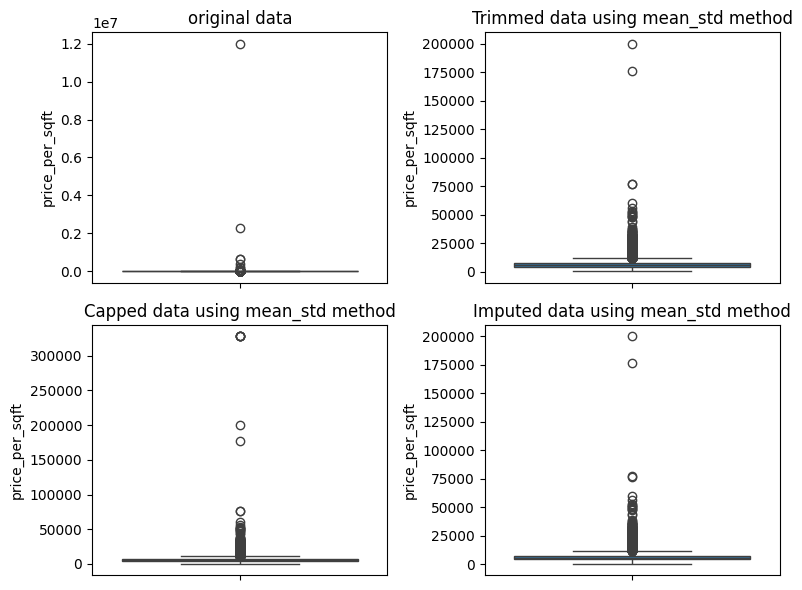

In [60]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

# Create a boxplot for each feature in a different subplot
sns.boxplot(df['price_per_sqft'], ax=axes[0, 0])
axes[0, 0].set_title('original data')

sns.boxplot(df_mean_std_trim['price_per_sqft'], ax=axes[0, 1])
axes[0, 1].set_title('Trimmed data using mean_std method')

sns.boxplot(df_mean_std_cap['price_per_sqft'], ax=axes[1, 0])
axes[1, 0].set_title('Capped data using mean_std method')

sns.boxplot(df_mean_std_imp['price_per_sqft'], ax=axes[1, 1])
axes[1, 1].set_title('Imputed data using mean_std method')

# Adjust layout
plt.tight_layout()
plt.show()

C:\Users\jeeva\AppData\Local\Temp\ipykernel_24984\3448065807.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'], ax=axes[0, 0])
C:\Users\jeeva\AppData\Local\Temp\ipykernel_24984\3448065807.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_mean_std_trim['price_per_sqft'

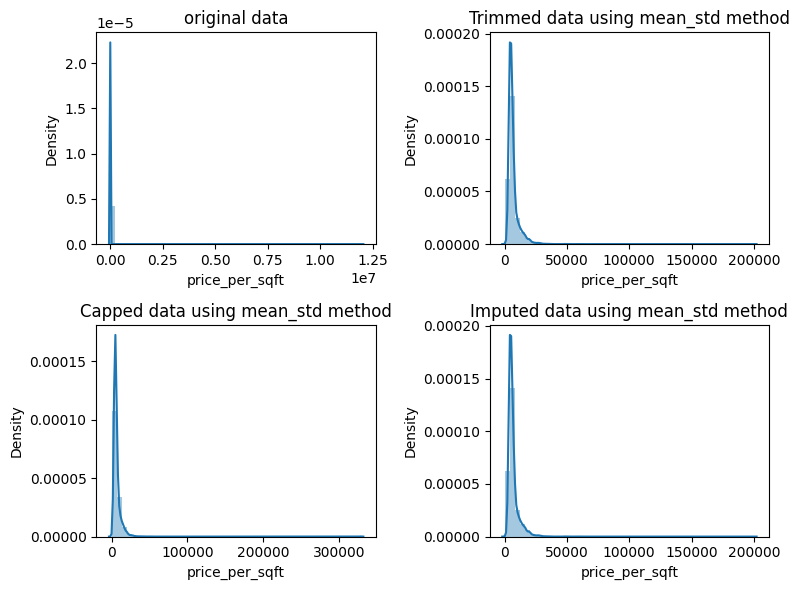

In [61]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

# Create a boxplot for each feature in a different subplot
sns.distplot(df['price_per_sqft'], ax=axes[0, 0])
axes[0, 0].set_title('original data')

sns.distplot(df_mean_std_trim['price_per_sqft'], ax=axes[0, 1])
axes[0, 1].set_title('Trimmed data using mean_std method')

sns.distplot(df_mean_std_cap['price_per_sqft'], ax=axes[1, 0])
axes[1, 0].set_title('Capped data using mean_std method')

sns.distplot(df_mean_std_imp['price_per_sqft'], ax=axes[1, 1])
axes[1, 1].set_title('Imputed data using mean_std method')

# Adjust layout
plt.tight_layout()
plt.show()

In [62]:
lp = df['price_per_sqft'].quantile(0.05)
print("lower quantile=",lp)
up = df['price_per_sqft'].quantile(0.95)
print("upper quantile=",up)
outliers_percentile = df[(df.price_per_sqft < lp) | (df.price_per_sqft > up)]
len(outliers_percentile)

lower quantile= 3107.8500000000004
upper quantile= 15312.099999999984


1320

In [63]:
#triming
df_percentile_trim=df.copy()
df_percentile_trim=df[(df.price_per_sqft >= lp) & (df.price_per_sqft <= up)]
len(df_percentile_trim)

11880

In [64]:
#Capping Change outliers to upper or lower limit
df_percentile_cap=df.copy()
df_percentile_cap['price_per_sqft'] = np.where(df_percentile_cap['price_per_sqft'] > up, up,
                                np.where(df_percentile_cap['price_per_sqft'] < lp, lp, df_percentile_cap['price_per_sqft']))

In [65]:
#Imputation: Replace outliers with the mean or median.
df_percentile_imp=df.copy()
median=df_percentile_imp['price_per_sqft'].median()
df_percentile_imp['price_per_sqft'] = np.where((df_percentile_imp['price_per_sqft'] > up) |
                                (df_percentile_imp['price_per_sqft'] < lp), median,  df_percentile_imp['price_per_sqft'])

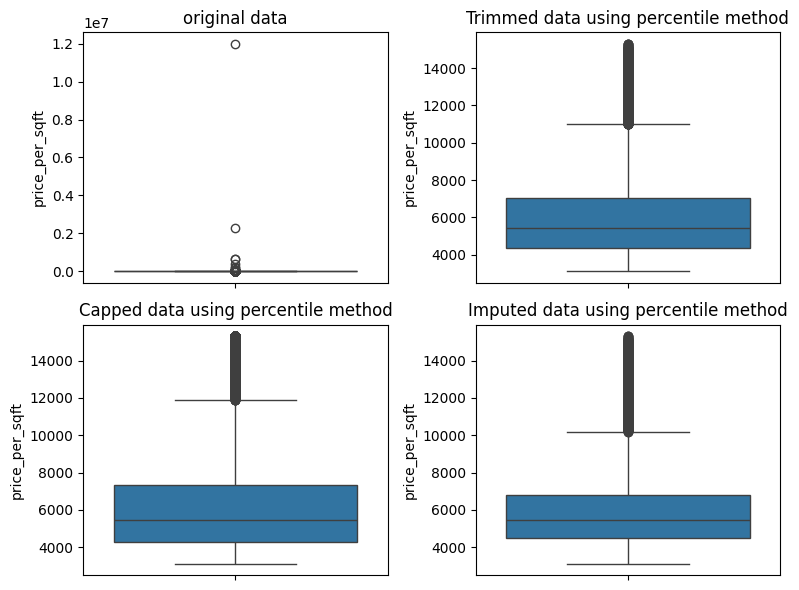

In [66]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

# Create a boxplot for each feature in a different subplot
sns.boxplot(df['price_per_sqft'], ax=axes[0, 0])
axes[0, 0].set_title('original data')

sns.boxplot(df_percentile_trim['price_per_sqft'], ax=axes[0, 1])
axes[0, 1].set_title('Trimmed data using percentile method')

sns.boxplot(df_percentile_cap['price_per_sqft'], ax=axes[1, 0])
axes[1, 0].set_title('Capped data using percentile method')

sns.boxplot(df_percentile_imp['price_per_sqft'], ax=axes[1, 1])
axes[1, 1].set_title('Imputed data using percentile method')

# Adjust layout
plt.tight_layout()
plt.show()

C:\Users\jeeva\AppData\Local\Temp\ipykernel_24984\1093719134.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'], ax=axes[0, 0])
C:\Users\jeeva\AppData\Local\Temp\ipykernel_24984\1093719134.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_percentile_trim['price_per_sqf

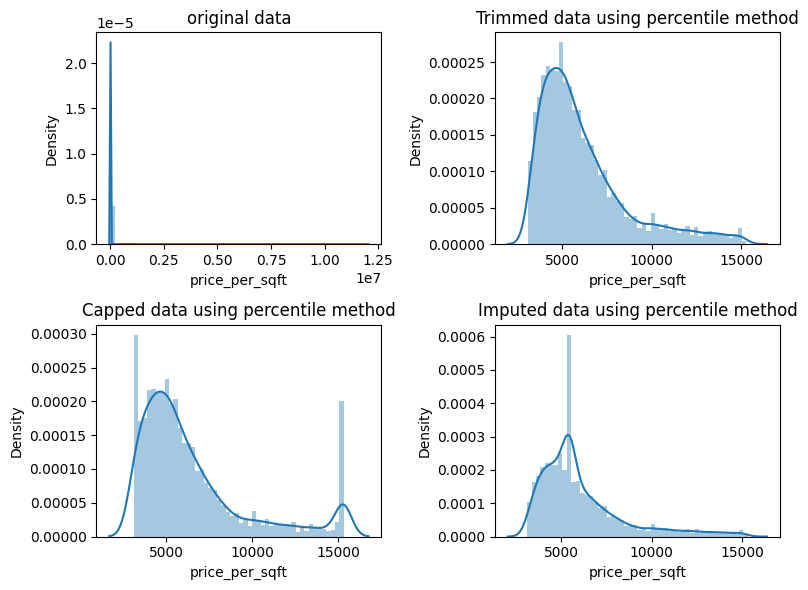

In [67]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

# Create a boxplot for each feature in a different subplot
sns.distplot(df['price_per_sqft'], ax=axes[0, 0])
axes[0, 0].set_title('original data')

sns.distplot(df_percentile_trim['price_per_sqft'], ax=axes[0, 1])
axes[0, 1].set_title('Trimmed data using percentile method')

sns.distplot(df_percentile_cap['price_per_sqft'], ax=axes[1, 0])
axes[1, 0].set_title('Capped data using percentile method')

sns.distplot(df_percentile_imp['price_per_sqft'], ax=axes[1, 1])
axes[1, 1].set_title('Imputed data using percentile method')

# Adjust layout
plt.tight_layout()
plt.show()

In [68]:
Q1 = df['price_per_sqft'].quantile(0.25)
print("lower quantile=",Q1)
Q3 = df['price_per_sqft'].quantile(0.75)
print("upper quantile=",Q3)

IQR = Q3 - Q1
lqb = Q1 - 1.5 * IQR
uqb = Q3 + 1.5 * IQR

print("lower quantile bound=",lqb)
print("upper quantile bound=",uqb)


lower quantile= 4267.0
upper quantile= 7317.0
lower quantile bound= -308.0
upper quantile bound= 11892.0


In [69]:
outliers_quantile=df[(df.price_per_sqft < lqb) | (df.price_per_sqft > uqb)]
len(outliers_quantile)

1265

In [70]:
#triming
df_quantile_trim=df.copy()
df_quantile_trim=df[(df.price_per_sqft >= lqb) & (df.price_per_sqft <= uqb)]
len(df_quantile_trim)

11935

In [71]:
#Capping Change outliers to upper or lower limit
df_quantile_cap=df.copy()
df_quantile_cap['price_per_sqft'] = np.where(df_quantile_cap['price_per_sqft'] > uqb, uqb,
                                np.where(df_quantile_cap['price_per_sqft'] < lqb, lqb, df_quantile_cap['price_per_sqft']))

In [72]:
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [88]:
#Imputation: Replace outliers with the mean or median.
df_quantile_imp=df.copy()
median=df_quantile_imp['price_per_sqft'].median()
df_quantile_imp['price_per_sqft'] = np.where((df_quantile_imp['price_per_sqft'] > uqb) |
                                (df_quantile_imp['price_per_sqft'] < lqb), mean,  df_quantile_imp['price_per_sqft'])

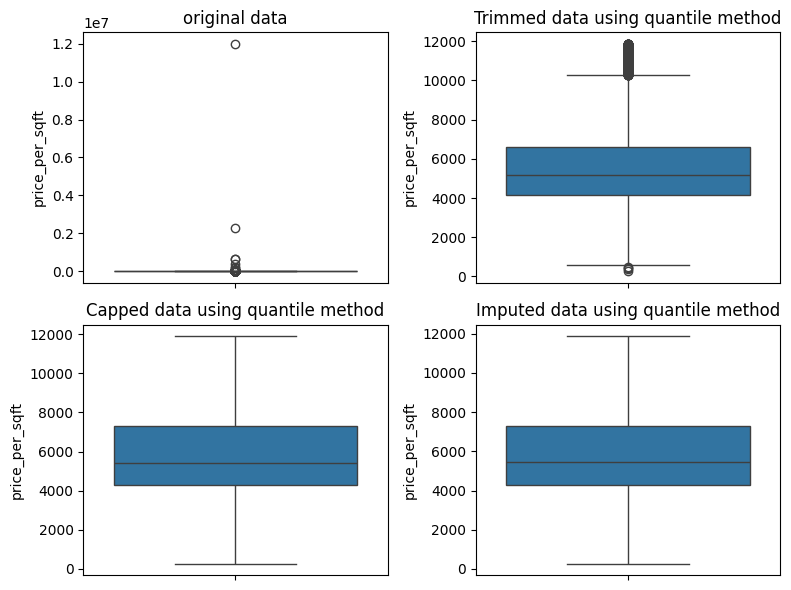

In [89]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

# Create a boxplot for each feature in a different subplot
sns.boxplot(df['price_per_sqft'], ax=axes[0, 0])
axes[0, 0].set_title('original data')

sns.boxplot(df_quantile_trim['price_per_sqft'], ax=axes[0, 1])
axes[0, 1].set_title('Trimmed data using quantile method')

sns.boxplot(df_quantile_cap['price_per_sqft'], ax=axes[1, 0])
axes[1, 0].set_title('Capped data using quantile method')

sns.boxplot(df_quantile_imp['price_per_sqft'], ax=axes[1, 1])
axes[1, 1].set_title('Imputed data using quantile method')

# Adjust layout
plt.tight_layout()
plt.show()

C:\Users\jeeva\AppData\Local\Temp\ipykernel_24984\1126508925.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'], ax=axes[0, 0])
C:\Users\jeeva\AppData\Local\Temp\ipykernel_24984\1126508925.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_quantile_trim['price_per_sqft'

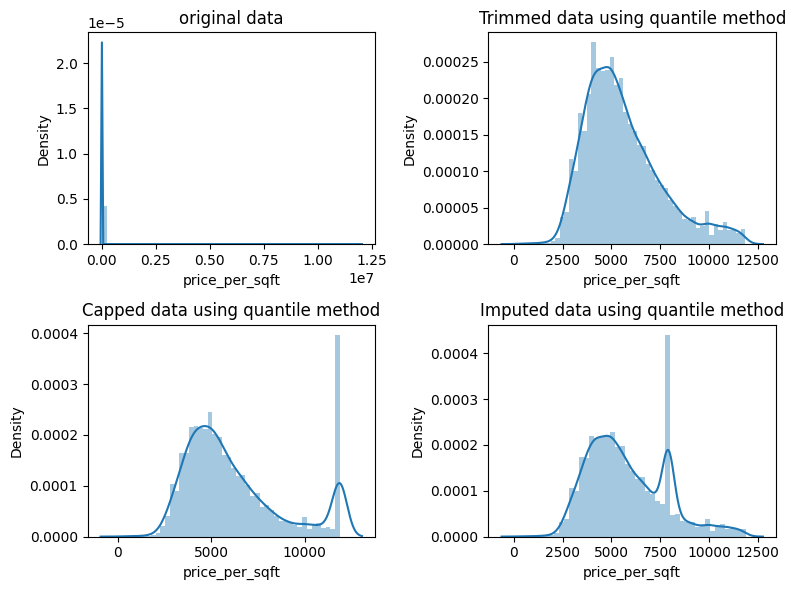

In [90]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

# Create a boxplot for each feature in a different subplot
sns.distplot(df['price_per_sqft'], ax=axes[0, 0])
axes[0, 0].set_title('original data')

sns.distplot(df_quantile_trim['price_per_sqft'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Trimmed data using quantile method')

sns.distplot(df_quantile_cap['price_per_sqft'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Capped data using quantile method')

sns.distplot(df_quantile_imp['price_per_sqft'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Imputed data using quantile method')

# Adjust layout
plt.tight_layout()
plt.show()

In [76]:
from scipy.stats import zscore
df1=df.copy()
df1['price_per_sqft_zscore']=zscore(df1['price_per_sqft'])

In [77]:
outliers_zscore=df[(df1.price_per_sqft_zscore <= -3) |  (df1.price_per_sqft_zscore >= 3)]
len(outliers_zscore)

5

In [78]:
outliers_zscore

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333


In [79]:
df1

,location,size,total_sqft,bath,price,bhk,price_per_sqft,price_per_sqft_zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.039554
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.030971
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.033876
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.015698
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.034391
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,-0.011538
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,0.029897
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.024946
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,0.023300


In [80]:
#triming 
df_zscore_trim=df1.copy()
df_zscore_trim = df1 [(df1.price_per_sqft_zscore < 3) & (df1.price_per_sqft_zscore > -3)]
len(df_zscore_trim)


13195

In [81]:
#Capping
df_zscore_cap=df1.copy()
df_zscore_cap['price_per_sqft'] = np.where(df_zscore_cap['price_per_sqft_zscore'] >= 3, mean + 3 * std,
                                np.where(df_zscore_cap['price_per_sqft_zscore'] <= -3, mean - 3 * std, df_zscore_cap['price_per_sqft']))


In [82]:
df1

,location,size,total_sqft,bath,price,bhk,price_per_sqft,price_per_sqft_zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.039554
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.030971
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.033876
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.015698
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.034391
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,-0.011538
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,0.029897
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.024946
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,0.023300


In [83]:
mean + 3 * std

328101.8177267502

In [84]:
df_zscore_cap[df1.price_per_sqft_zscore > 3]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,price_per_sqft_zscore
345,other,3 Bedroom,11.0,3.0,74.0,3,328101.817727,6.229266
1106,other,5 Bedroom,24.0,2.0,150.0,5,328101.817727,5.782062
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,328101.817727,112.366280
4924,other,7 BHK,5.0,7.0,115.0,7,328101.817727,21.476881
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,328101.817727,3.330231


In [85]:
#Imputation: Replace outliers with the mean or median.
df_zscore_imp=df1.copy()
median=df_zscore_imp['price_per_sqft'].median()
df_zscore_imp['price_per_sqft'] = np.where((df_zscore_imp['price_per_sqft_zscore'] >= 3) |
                                (df_zscore_imp['price_per_sqft_zscore'] <= -3), mean,  df_zscore_imp['price_per_sqft'])
df_zscore_imp


,location,size,total_sqft,bath,price,bhk,price_per_sqft,price_per_sqft_zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.0,-0.039554
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.0,-0.030971
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.0,-0.033876
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.0,-0.015698
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.0,-0.034391
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.0,-0.011538
13196,other,4 BHK,3600.0,5.0,400.00,4,11111.0,0.029897
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.0,-0.024946
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.0,0.023300


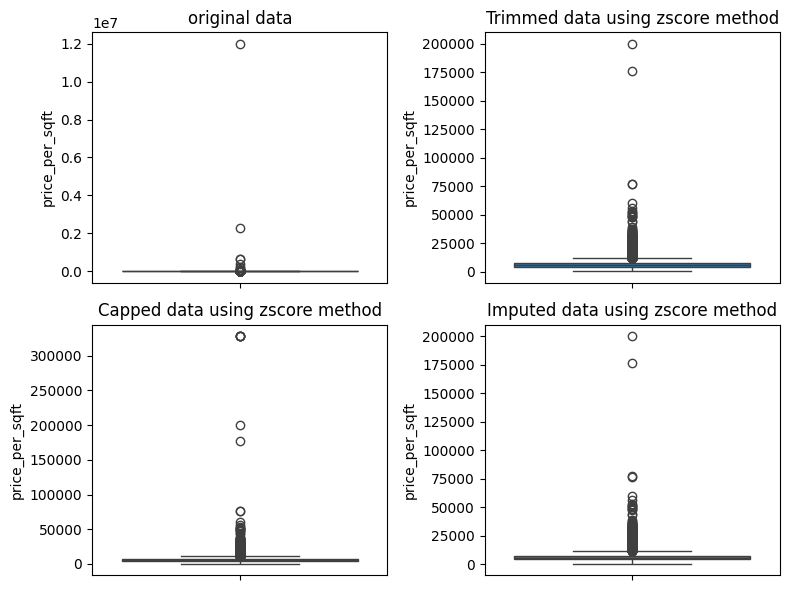

In [86]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

# Create a boxplot for each feature in a different subplot
sns.boxplot(df['price_per_sqft'], ax=axes[0, 0])
axes[0, 0].set_title('original data')

sns.boxplot(df_zscore_trim['price_per_sqft'], ax=axes[0, 1])
axes[0, 1].set_title('Trimmed data using zscore method')

sns.boxplot(df_zscore_cap['price_per_sqft'], ax=axes[1, 0])
axes[1, 0].set_title('Capped data using zscore method')

sns.boxplot(df_zscore_imp['price_per_sqft'], ax=axes[1, 1])
axes[1, 1].set_title('Imputed data using zscore method')

# Adjust layout
plt.tight_layout()
plt.show()

C:\Users\jeeva\AppData\Local\Temp\ipykernel_24984\3688042956.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'], ax=axes[0, 0])
C:\Users\jeeva\AppData\Local\Temp\ipykernel_24984\3688042956.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_zscore_trim['price_per_sqft'],

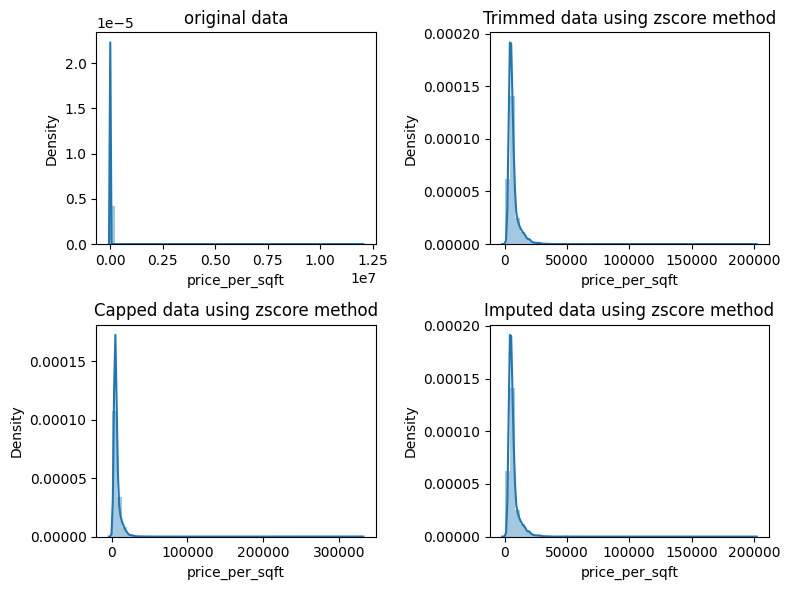

In [87]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

# Create a boxplot for each feature in a different subplot
sns.distplot(df['price_per_sqft'], ax=axes[0, 0])
axes[0, 0].set_title('original data')

sns.distplot(df_zscore_trim['price_per_sqft'], ax=axes[0, 1])
axes[0, 1].set_title('Trimmed data using zscore method')

sns.distplot(df_zscore_cap['price_per_sqft'], ax=axes[1, 0])
axes[1, 0].set_title('Capped data using zscore method')

sns.distplot(df_zscore_imp['price_per_sqft'], ax=axes[1, 1])
axes[1, 1].set_title('Imputed data using zscore method')

# Adjust layout
plt.tight_layout()
plt.show()

C:\Users\jeeva\AppData\Local\Temp\ipykernel_24984\1198152165.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_quantile_trim['price_per_sqft'], kde=True)


<Axes: xlabel='price_per_sqft', ylabel='Density'>

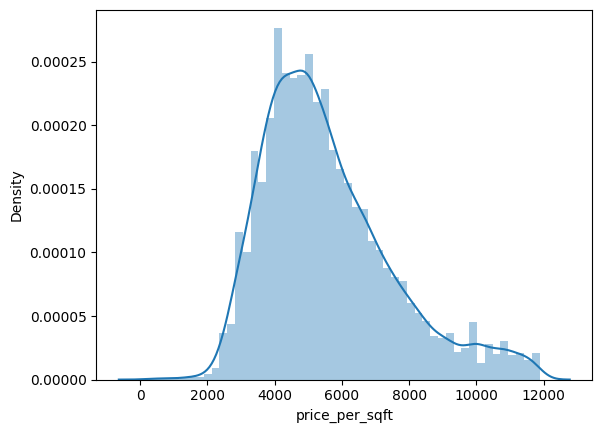

In [93]:
#Trimming data using Quantile or percentile mrthods have the least outliers


sns.distplot(df_quantile_trim['price_per_sqft'], kde=True)


C:\Users\jeeva\AppData\Local\Temp\ipykernel_24984\737103946.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_percentile_trim['price_per_sqft'], kde=True)


<Axes: xlabel='price_per_sqft', ylabel='Density'>

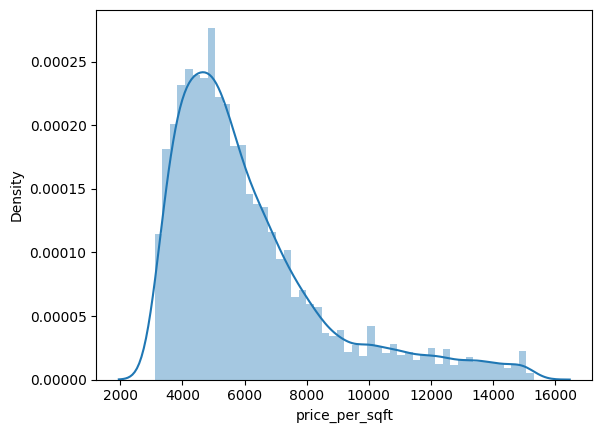

In [94]:
sns.distplot(df_percentile_trim['price_per_sqft'], kde=True)

In [96]:
from scipy.stats import skew, kurtosis
skewness_before_quantile = skew(df_quantile_trim['price_per_sqft'])
kurtosis_before_quantile = kurtosis(df_quantile_trim['price_per_sqft'])
skewness_before_percentile = skew(df_percentile_trim['price_per_sqft'])
kurtosis_before_percentile = kurtosis(df_percentile_trim['price_per_sqft'])
print(f'Skewness before transformation of df_quantile_trim : {skewness_before_quantile}')
print(f'Kurtosis before transformation of df_quantile_trim: {kurtosis_before_quantile}')
print(f'Skewness before transformation of df_percantile_trim : {skewness_before_percentile}')
print(f'Kurtosis before transformation of df_percantile_trim: {kurtosis_before_percentile}')

Skewness before transformation of df_quantile_trim : 0.9445732298531184
Kurtosis before transformation of df_quantile_trim: 0.6784399584501744
Skewness before transformation of df_percantile_trim : 1.5103271608540716
Kurtosis before transformation of df_percantile_trim: 2.0483092498517745


In [98]:
#Applying log transformation since positively  skewed
df_quantile_trim['price_per_sqft_log'] = np.log1p(df_quantile_trim['price_per_sqft'])
df_percentile_trim['price_per_sqft_log'] = np.log1p(df_percentile_trim['price_per_sqft'])

C:\Users\jeeva\AppData\Local\Temp\ipykernel_24984\756667691.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantile_trim['price_per_sqft_log'] = np.log1p(df_quantile_trim['price_per_sqft'])
C:\Users\jeeva\AppData\Local\Temp\ipykernel_24984\756667691.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_percentile_trim['price_per_sqft_log'] = np.log1p(df_percentile_trim['price_per_sqft'])


C:\Users\jeeva\AppData\Local\Temp\ipykernel_24984\3610224833.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_quantile_trim['price_per_sqft_log'], kde=True)


<Axes: xlabel='price_per_sqft_log', ylabel='Density'>

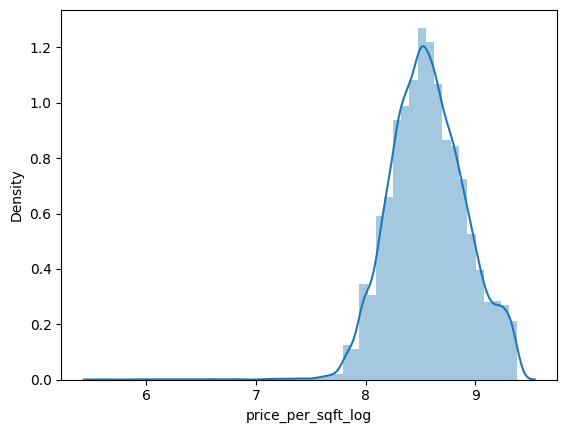

In [103]:
sns.distplot(df_quantile_trim['price_per_sqft_log'], kde=True)

C:\Users\jeeva\AppData\Local\Temp\ipykernel_24984\2707778155.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_percentile_trim['price_per_sqft_log'], kde=True)


<Axes: xlabel='price_per_sqft_log', ylabel='Density'>

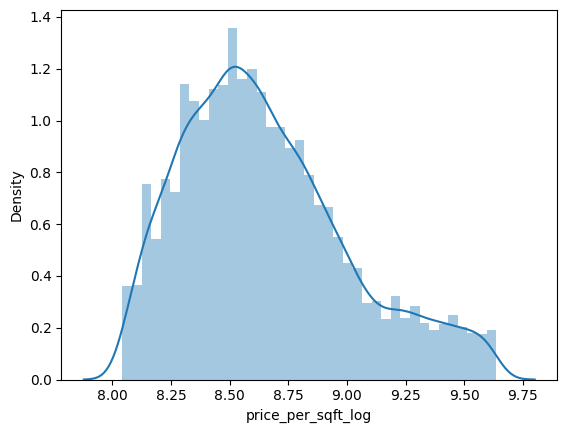

In [102]:
sns.distplot(df_percentile_trim['price_per_sqft_log'], kde=True)

In [101]:
skewness_before_quantile_transformed = skew(df_quantile_trim['price_per_sqft_log'])
kurtosis_before_quantile_transformed = kurtosis(df_quantile_trim['price_per_sqft_log'])
skewness_before_percentile_transformed = skew(df_percentile_trim['price_per_sqft_log'])
kurtosis_before_percentile_transformed = kurtosis(df_percentile_trim['price_per_sqft_log'])
print(f'Skewness after transformation of df_quantile_trim : {skewness_before_quantile_transformed}')
print(f'Kurtosis after transformation of df_quantile_trim: {kurtosis_before_quantile_transformed}')
print(f'Skewness after transformation of df_percantile_trim : {skewness_before_percentile_transformed}')
print(f'Kurtosis after transformation of df_percantile_trim: {kurtosis_before_percentile_transformed}')

Skewness after transformation of df_quantile_trim : -0.12988210833124453
Kurtosis after transformation of df_quantile_trim: 1.3369230684904956
Skewness after transformation of df_percantile_trim : 0.6778151659180617
Kurtosis after transformation of df_percantile_trim: -0.0589353394538894


In [105]:
#
#Check the correlation between all the numerical columns and plot heatmap

# Selecting only the numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df_numerical = df[numerical_cols]

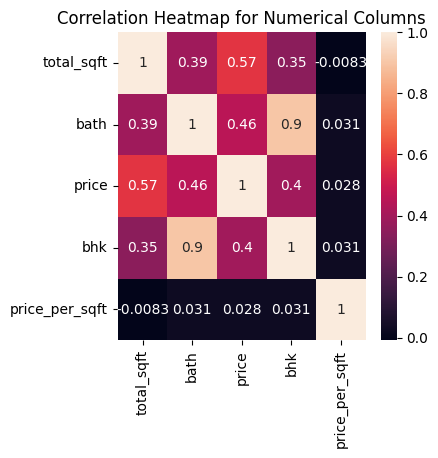

In [108]:
# Compute correlation matrix for numerical columns only
correlation_matrix = df_numerical.corr()

# Plot the heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap for Numerical Columns')
plt.show()

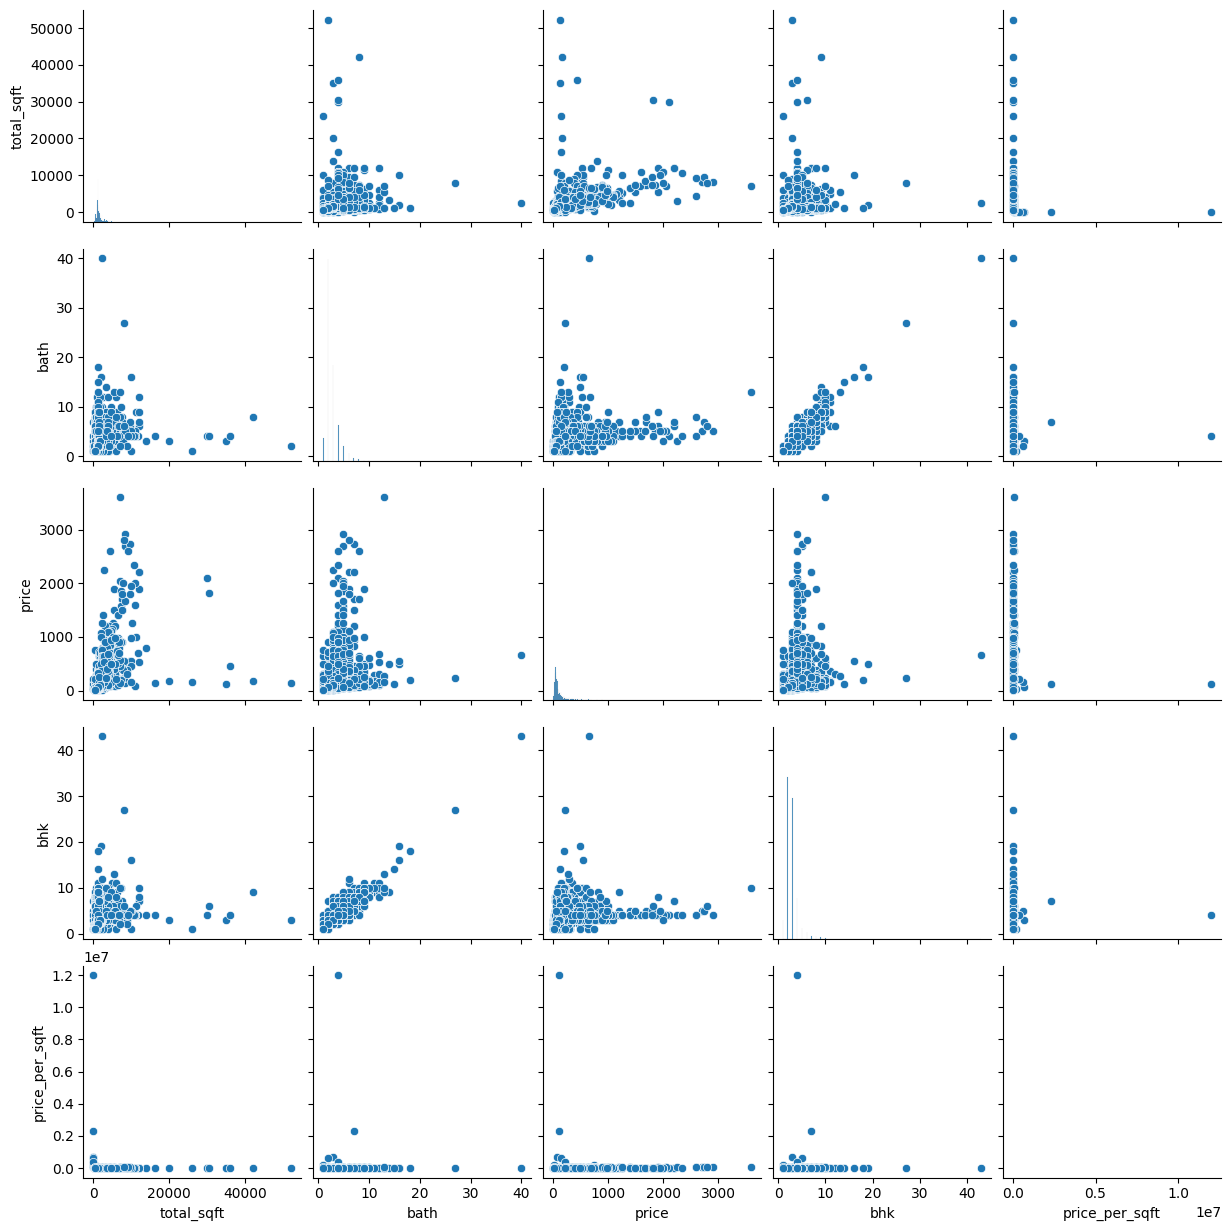

In [109]:
# Pairwise scatter plots between relevant numerical variables
sns.pairplot(df_numerical)
plt.show()